In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataset=pd.read_csv("supermarket_sales.csv")

In [9]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

In [3]:
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
dataset.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
dataset.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

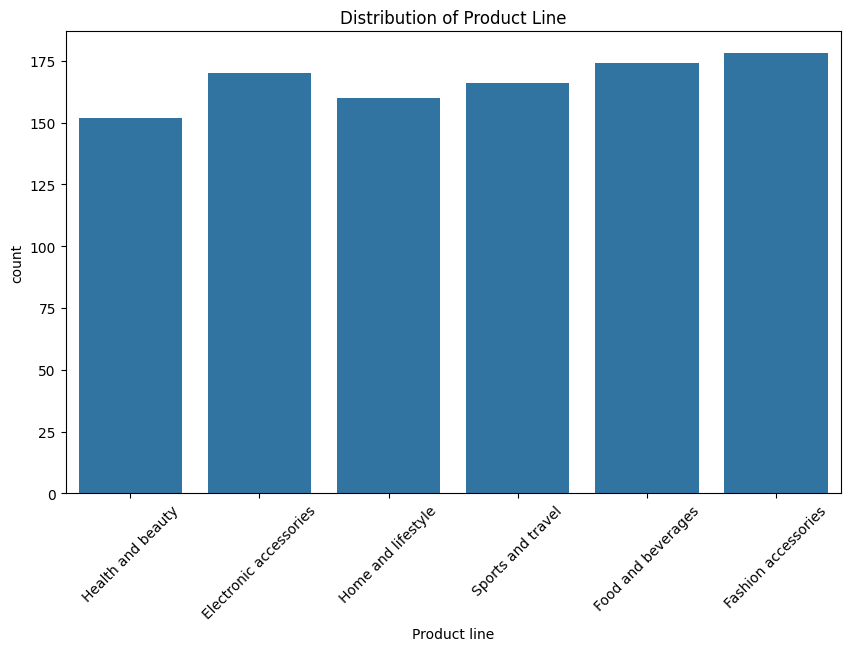

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Product line')
plt.xticks(rotation=45)
plt.title('Distribution of Product Line')
plt.show()

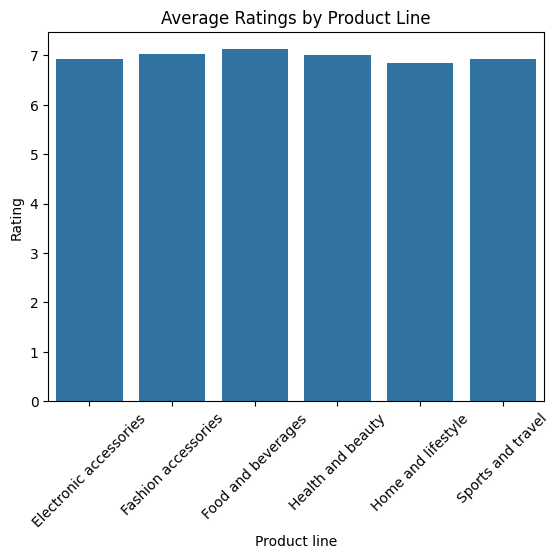

In [49]:
mean_ratings = dataset.groupby('Product line')['Rating'].mean().reset_index()
sns.barplot(x='Product line', y='Rating', data=mean_ratings)
plt.xticks(rotation=45)  
plt.title('Average Ratings by Product Line')
plt.show()

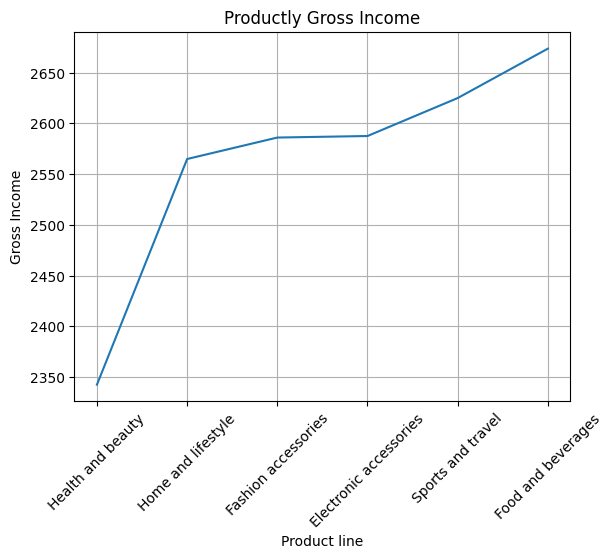

In [32]:
monthly_income = dataset.groupby('Product line')['gross income'].sum().sort_values()
sns.lineplot(x=monthly_income.index, y=monthly_income.values)
plt.title('Product Line Gross Income')
plt.xlabel('Product line')
plt.xticks(rotation=45)  
plt.ylabel('Gross Income')
plt.grid(True)
plt.show()

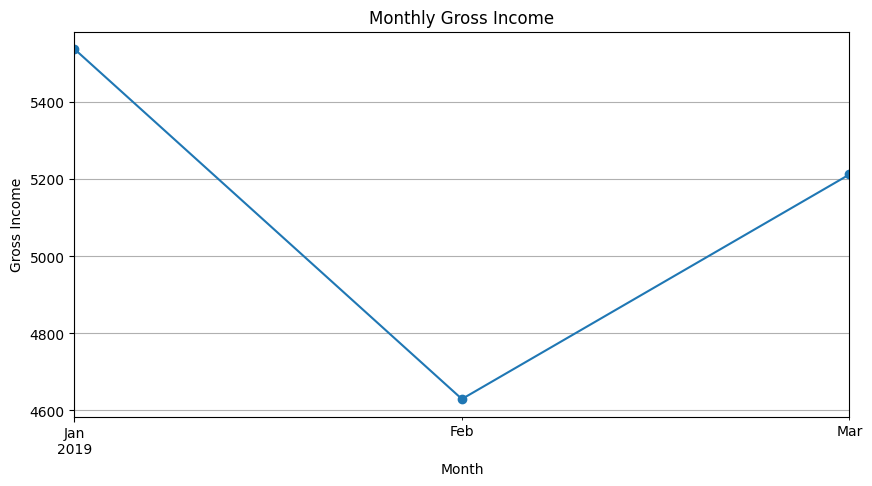

In [29]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.to_period('M')

monthly_income = dataset.groupby('Month')['gross income'].sum()

plt.figure(figsize=(10, 5))
monthly_income.plot(kind='line', marker='o')
plt.title('Monthly Gross Income')
plt.xlabel('Month')
plt.ylabel('Gross Income')
plt.grid(True)
plt.show()


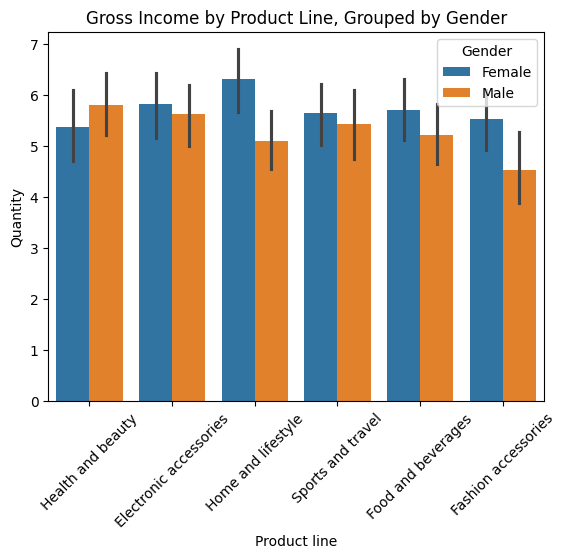

In [38]:
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=dataset)
plt.title('Gross Income by Product Line, Grouped by Gender')
plt.xticks(rotation=45)
plt.show()


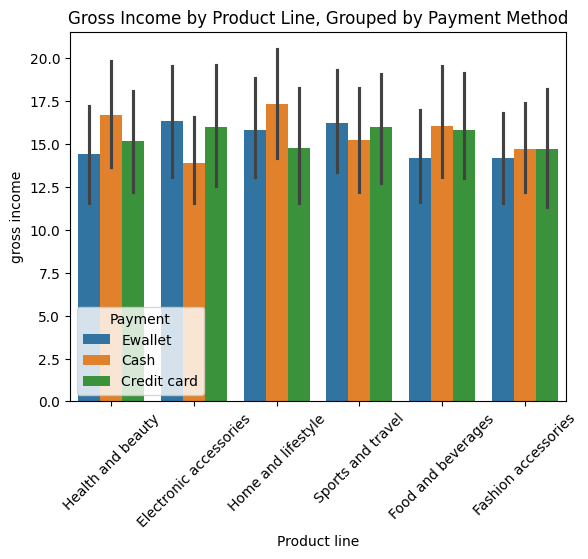

In [41]:
sns.barplot(x='Product line', y='gross income', hue='Payment', data=dataset)
plt.title('Gross Income by Product Line, Grouped by Payment Method')
plt.xticks(rotation=45)
plt.show()


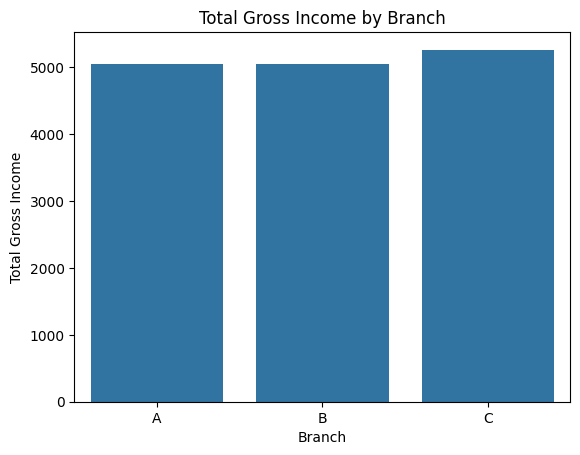

In [48]:
branch_income = dataset.groupby('Branch')['gross income'].sum().reset_index()
sns.barplot(x='Branch', y='gross income', data=branch_income)
plt.title('Total Gross Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.show()


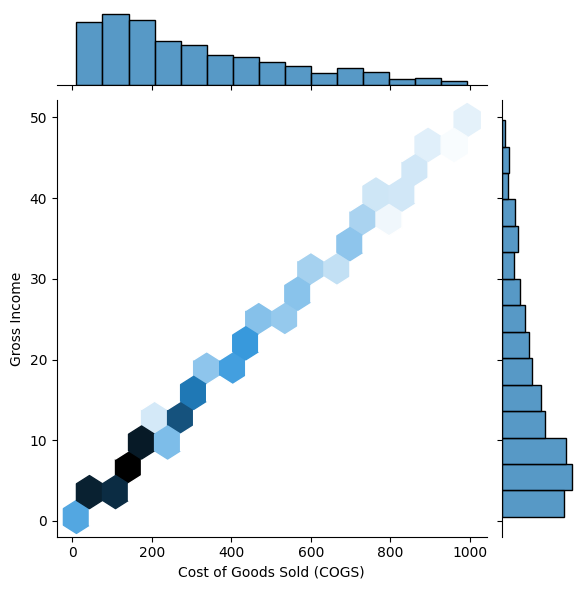

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='cogs', y='gross income', data=dataset, kind='hex')
plt.xlabel('Cost of Goods Sold (COGS)')
plt.ylabel('Gross Income')
plt.show()


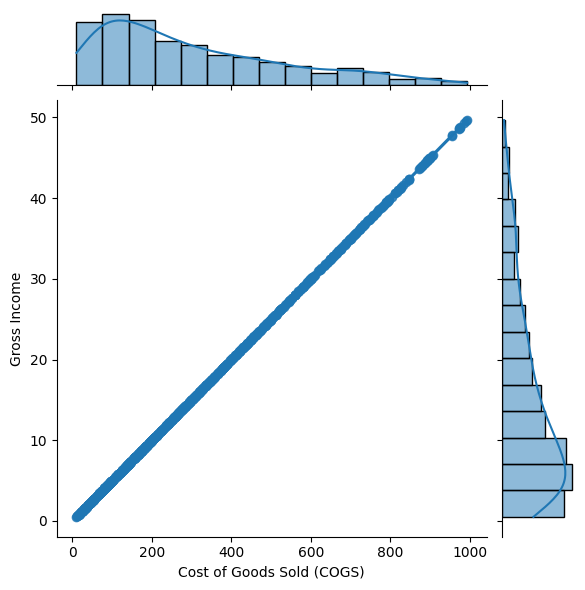

In [53]:
sns.jointplot(x='cogs', y='gross income', data=dataset, kind='reg')
plt.xlabel('Cost of Goods Sold (COGS)')
plt.ylabel('Gross Income')
plt.show()


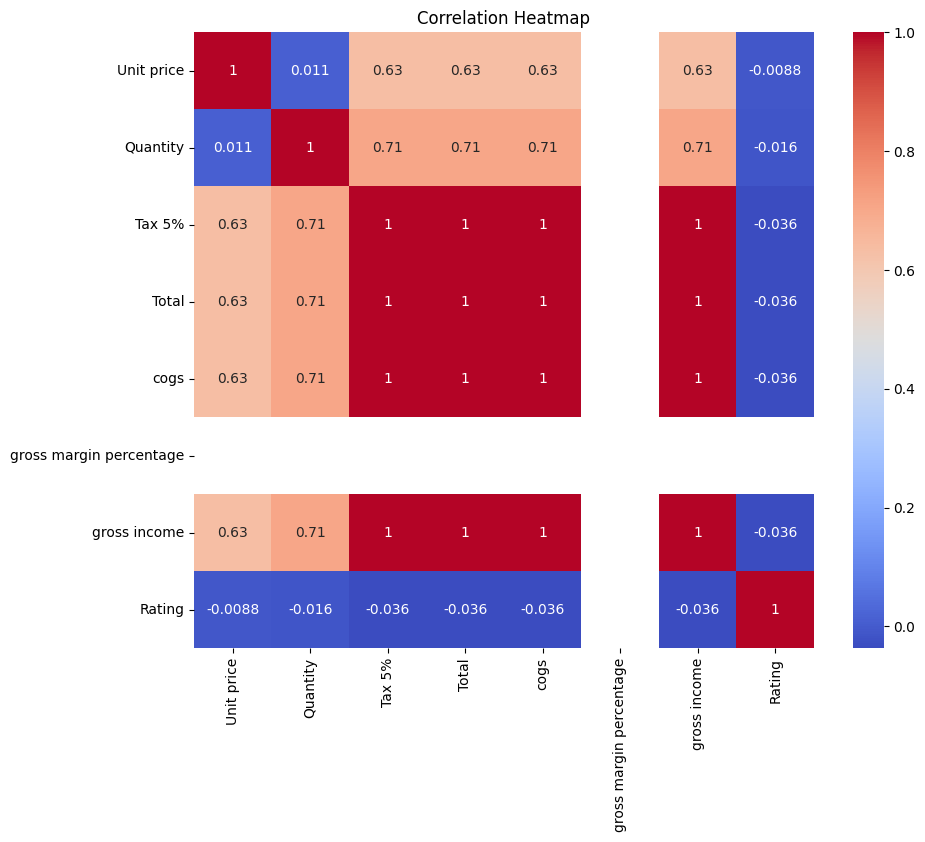

In [62]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_data = dataset[numeric_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
X = dataset[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income']]
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0748688269198463
